# This notebook is designed for the analysis of Amazon review data, aiming to identify patterns in customer reviews using NLP techniques and visualization.

## Table of Contents

1. Data Loading and Preprocessing

2. Exploratory Data Analysis<br>
   2.1 Summary Statistics<br>
   2.2 Rating Distribution<br>
   2.3 Correlation between Rating and Helpful Votes<br>
   2.4 Number of reviews per year<br>
   2.5 Average review score per year

3. Top 10 and Worst 10 Products by Rating

4. Visualization of Top 10 and Bottom 10 Products

5. Word Count Analysis and Visualization<br>
   5.1 Word Counts of Whole Review<br>
   5.2 Average Rating for Each Word<br>
   5.3 Most common words in low rating reviews<br>
   5.4 Most common words exclusively appear on bad reviews<br>
   5.5 Differences Between Good and Bad Reviews<br>
   5.6 Differences Between Helpful and Non-Helpful Reviews


## 1. Data Loading and Preprocessing <a name="data-loading-and-preprocessing"></a>

First, let's load the dataset and perform some initial preprocessing steps.


<small>
The dataset contains the following columns:

- Id: The ID of the review. 
- ProductId: The ID of the product.
- UserId: The ID of the user.
- ProfileName: The name of the user.
- HelpfulnessNumerator: Number of users who found the review helpful.
- HelpfulnessDenominator: Number of users who indicated whether they found the review helpful.
- Score: The rating of the product.
- Time: The time of the review (in Unix time).
- Summary: A brief summary of the review.
- Text: The text of the review.
</small>


In [1]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('Reviews.csv')

# Display the first few rows
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##  2. Exploratory Data Analysis <a name="exploratory-data-analysis"></a>
Perform exploratory data analysis to gain insights into the dataset.

### 2.1 Summary Statistics <a name="summary-statistics"></a>

In [3]:
# Check the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
# Compute basic statistics for the numeric columns
data.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


### 2.2 Rating Distribution <a name="rating-distribution"></a>


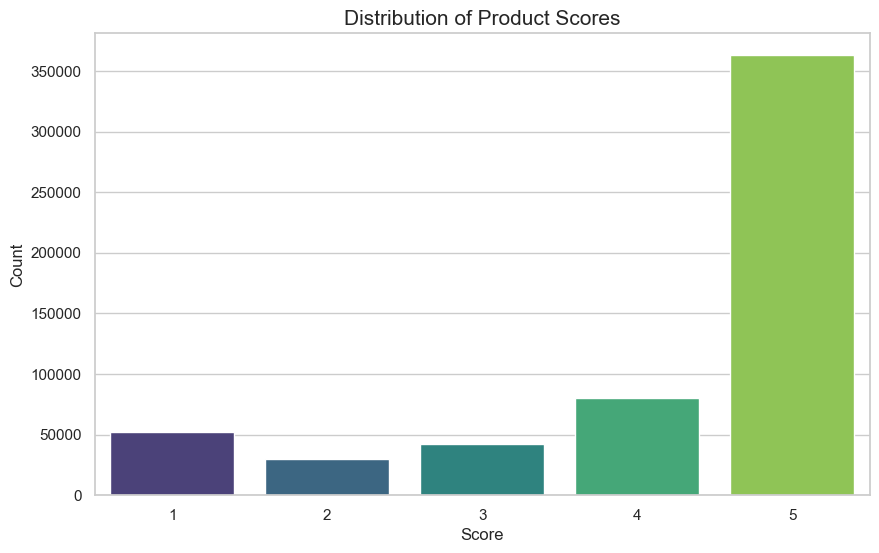

In [5]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of the Score
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=data, palette='viridis')
plt.title('Distribution of Product Scores', fontsize=15)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### 2.3 Correlation between Rating and Helpful Votes <a name="correlation-between-rating-and-helpful-votes"></a>

In [6]:
# Create a new column 'HelpfulnessRatio'
data['HelpfulnessRatio'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']

# Replace the inf and -inf with NaN (resulting from division by zero)
data['HelpfulnessRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Show the first few rows
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN


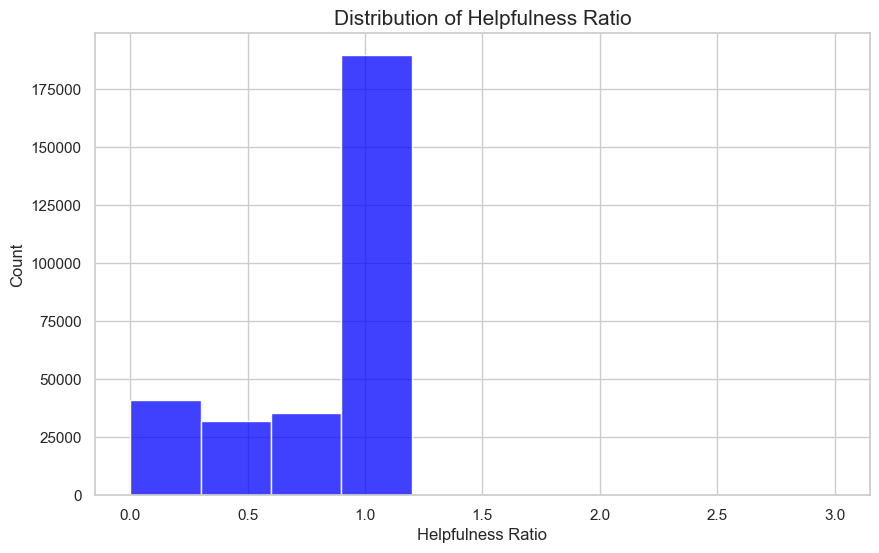

In [7]:
# Create a histogram of the HelpfulnessRatio
plt.figure(figsize=(10, 6))
sns.histplot(data[data['HelpfulnessRatio'].notna()]['HelpfulnessRatio'], bins=10, kde=False, color='blue')
plt.title('Distribution of Helpfulness Ratio', fontsize=15)
plt.xlabel('Helpfulness Ratio', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [8]:
# Convert the Time column to datetime
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# Extract the year from the Time column and create a new Year column
data['Year'] = data['Time'].dt.year

# Display the first few rows
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,2012


### 2.4 Number of reviews per year

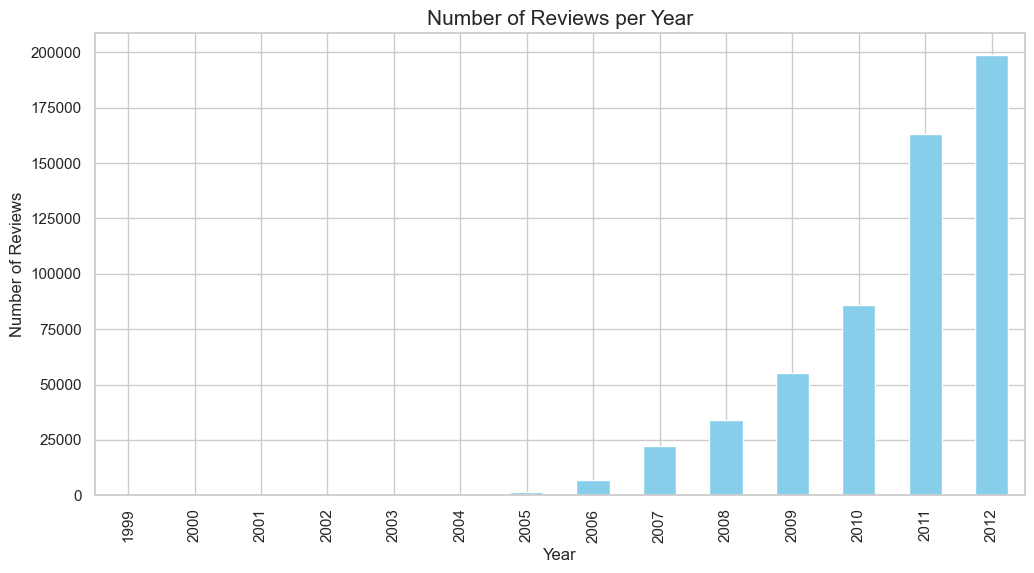

In [9]:
# Create a bar plot of the number of reviews per year
plt.figure(figsize=(12, 6))
data['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()


### 2.5 Average review score per year

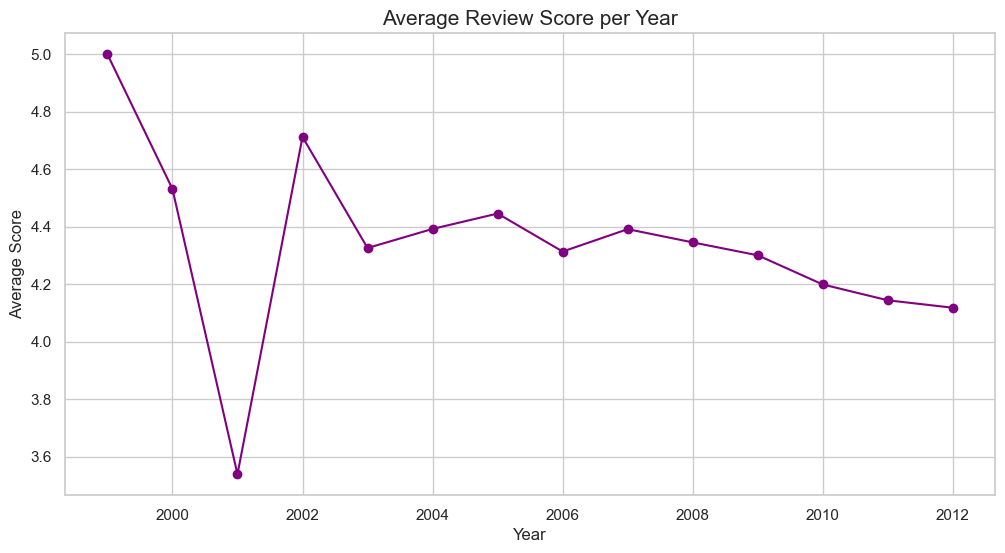

In [10]:
# Compute the average score per year
average_score_per_year = data.groupby('Year')['Score'].mean()

# Create a line plot of the average score per year
plt.figure(figsize=(12, 6))
average_score_per_year.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Average Review Score per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True)
plt.show()


## 3. Top 10 and Worst 10 Products by Rating <a name="top-10-and-worst-10-products-by-rating"></a>
Identify the top 10 and worst 10 products based on their average ratings.

In [11]:

# Calculate the number of reviews each product has received
review_counts = data['ProductId'].value_counts()

# Calculate the 90th percentile of the review count distribution
threshold = np.percentile(review_counts, 90)

# Create a mask for products that have received at least 'threshold' reviews
mask = (data['ProductId'].map(review_counts) >= threshold)

# Calculate the average score for each product
average_scores = data[mask].groupby('ProductId')['Score'].mean()

# Find the top 10 products
top_10_products = average_scores.nlargest(10)

# Find the worst 10 products
worst_10_products = average_scores.nsmallest(10)

top_10_products, worst_10_products


(ProductId
 B0001BH5YM    5.0
 B0001BVO9Y    5.0
 B0001GZ6H0    5.0
 B0001M0Z3O    5.0
 B0002ASCS0    5.0
 B0002DD8S6    5.0
 B0005XP6J2    5.0
 B0008JGWNW    5.0
 B0009XLVDS    5.0
 B0009XPD46    5.0
 Name: Score, dtype: float64,
 ProductId
 B0032GREWQ    1.062500
 B004ET5TP4    1.285714
 B000NY8OLK    1.315789
 B006N3I69A    1.343511
 B0002DH5MG    1.372093
 B004H3N2LU    1.373494
 B002EAN3T4    1.520000
 B000H26J7E    1.521739
 B000E1HW0G    1.571429
 B00346J8BO    1.592593
 Name: Score, dtype: float64)

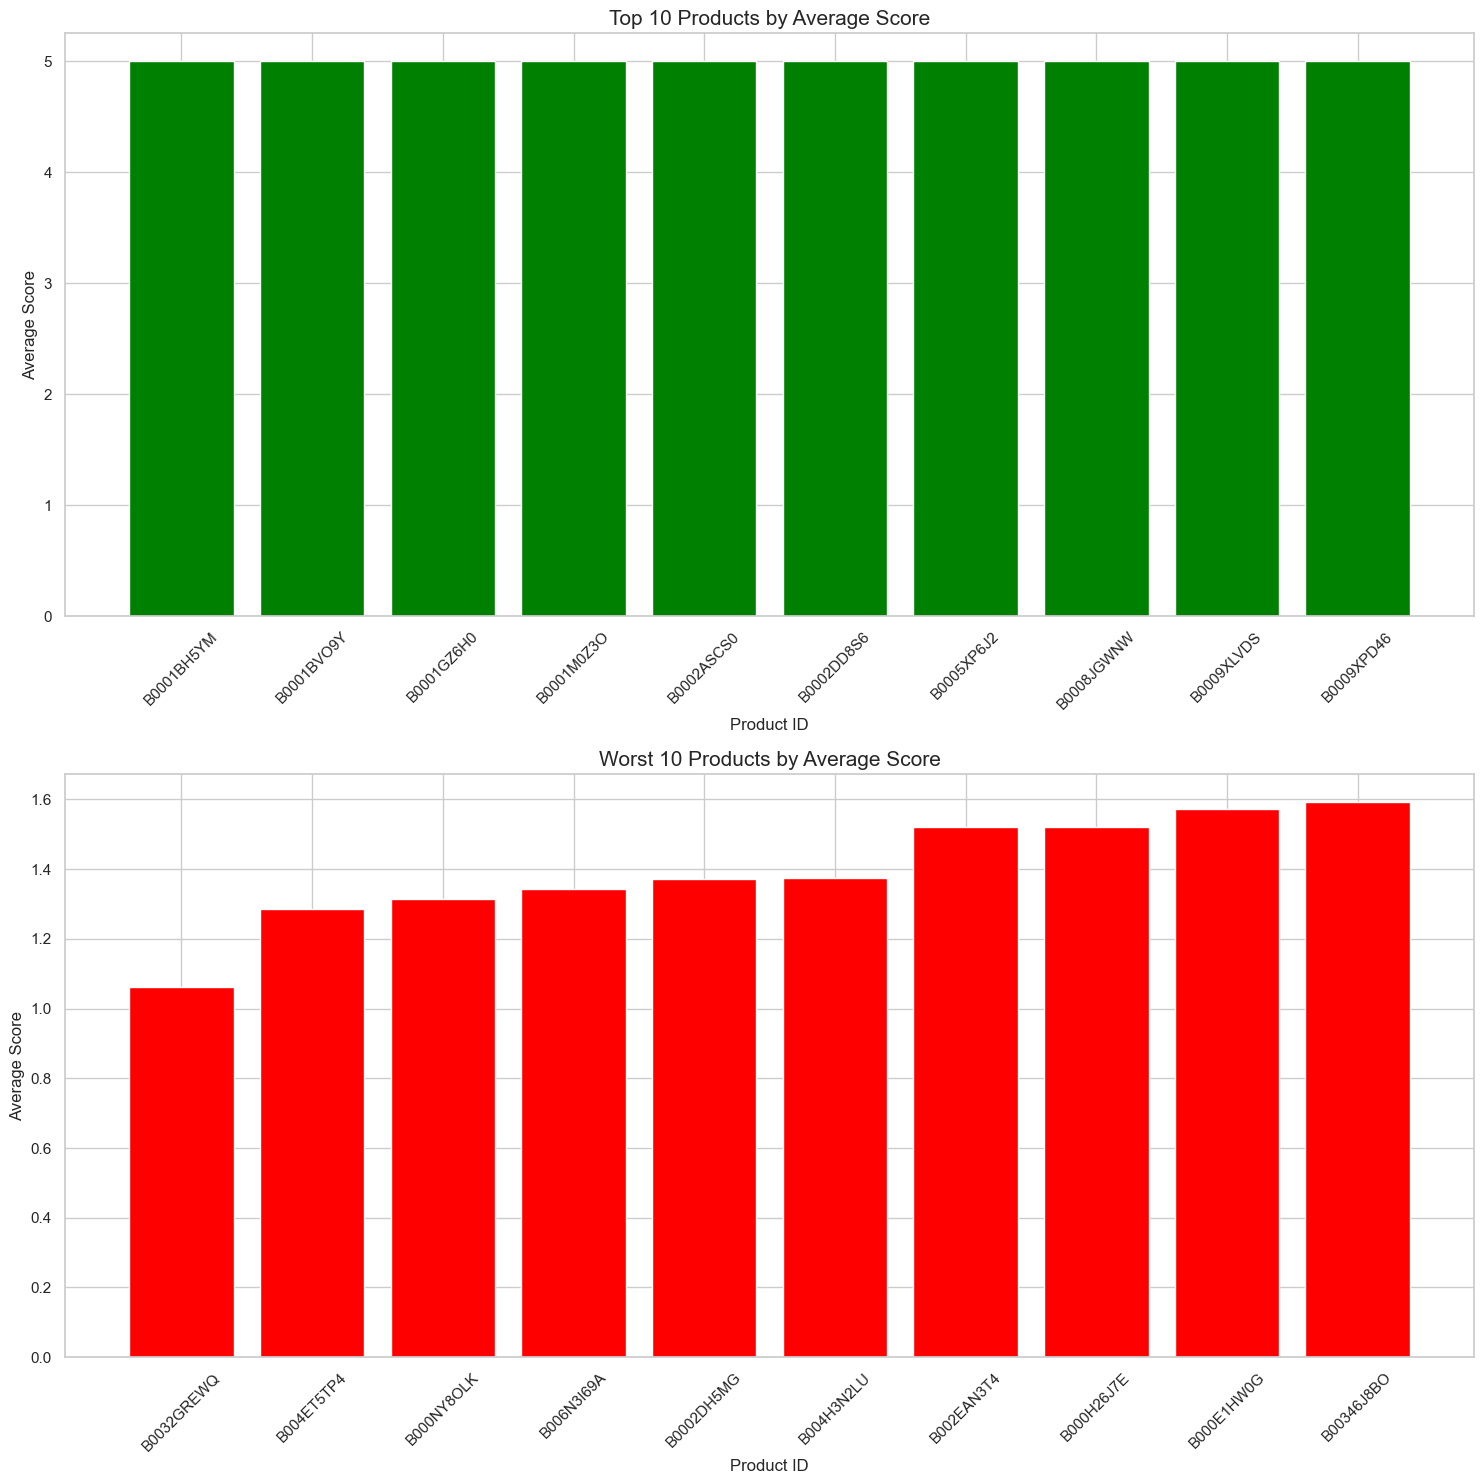

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

# Create a bar plot for the top 10 products
ax[0].bar(top_10_products.index, top_10_products, color='green')
ax[0].set_title('Top 10 Products by Average Score', fontsize=15)
ax[0].set_xlabel('Product ID', fontsize=12)
ax[0].set_ylabel('Average Score', fontsize=12)
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)

# Create a bar plot for the worst 10 products
ax[1].bar(worst_10_products.index, worst_10_products, color='red')
ax[1].set_title('Worst 10 Products by Average Score', fontsize=15)
ax[1].set_xlabel('Product ID', fontsize=12)
ax[1].set_ylabel('Average Score', fontsize=12)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


## 5. Word Count Analysis and Visualization <a name="word-count-analysis-and-visualization"></a>
Perform analysis on the word counts in the reviews and visualize the results.

### 5.1 Word Counts of Whole Review <a name="word-counts-of-whole-review"></a>

In [21]:
# Import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import string
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stop words, 'br', and lemmatize
    stop_words = set(stopwords.words('english'))
    stop_words.add('br')  # Add 'br' to the set of words to be removed
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return words



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shado\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shado\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


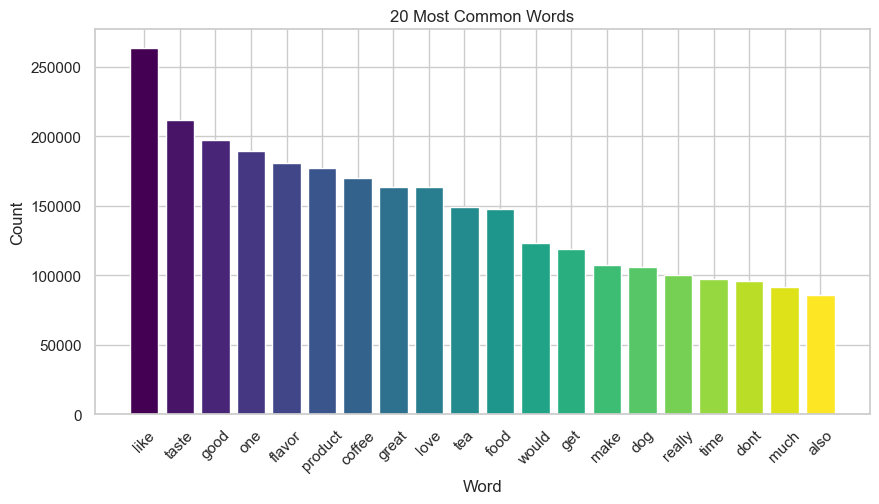

In [22]:
# Apply the preprocessing function to the 'Text' column
data['ProcessedText'] = data['Text'].apply(preprocess_text)

# Count the occurrence of each word
word_counts = Counter(word for words in data['ProcessedText'] for word in words)

# Identify the 20 most common words
most_common_words = word_counts.most_common(20)

# Create a bar plot of the word counts
plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_words)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


### 5.2 Average Rating for Each Word <a name="average-rating-for-each-word"></a>

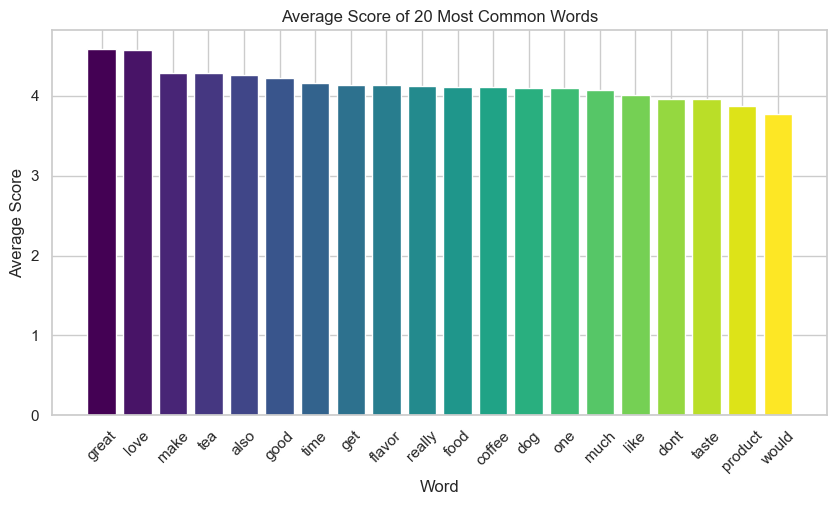

In [23]:
unique_words = set(word for words in data['ProcessedText'] for word in words)

# Initialize a dictionary to hold the total score and count of each word
word_scores = {word: [0, 0] for word in unique_words}

# Loop over the reviews and update the scores and counts
for words, rating in zip(data['ProcessedText'], data['Score']):
    for word in words:
        word_scores[word][0] += rating
        word_scores[word][1] += 1

# Calculate the average score for each word
average_word_scores = {word: total_score / count for word, (total_score, count) in word_scores.items()}

# Identify the 20 most common words
most_common_words = [word for word, count in Counter(word for words in data['ProcessedText'] for word in words).most_common(20)]

# Get the average scores of the most common words and sort them by score
common_word_scores = sorted([(word, average_word_scores[word]) for word in most_common_words], key=lambda x: x[1], reverse=True)

# Create a bar plot of the average scores
plt.figure(figsize=(10, 5))
words, scores = zip(*common_word_scores)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, scores, color=colors)
plt.xlabel('Word')
plt.ylabel('Average Score')
plt.title('Average Score of 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

### 5.3 Most common words in low rating reviews <a name="Most-common-words-in-low-rating-reviews"></a>

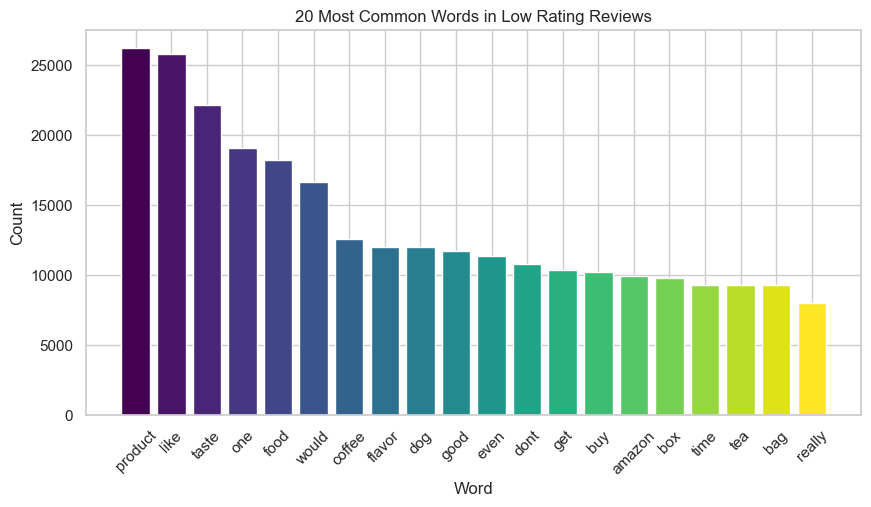

In [24]:
# Filter the data to include only reviews with a rating below 2
low_rating_data = data[data['Score'] < 2]

# Count the occurrence of each word in the low rating reviews
word_counts = Counter(word for words in low_rating_data['ProcessedText'] for word in words)

# Identify the 20 most common words in the low rating reviews
most_common_words = word_counts.most_common(20)

# Create a bar plot of the word counts
plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_words)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('20 Most Common Words in Low Rating Reviews')
plt.xticks(rotation=45)
plt.show()

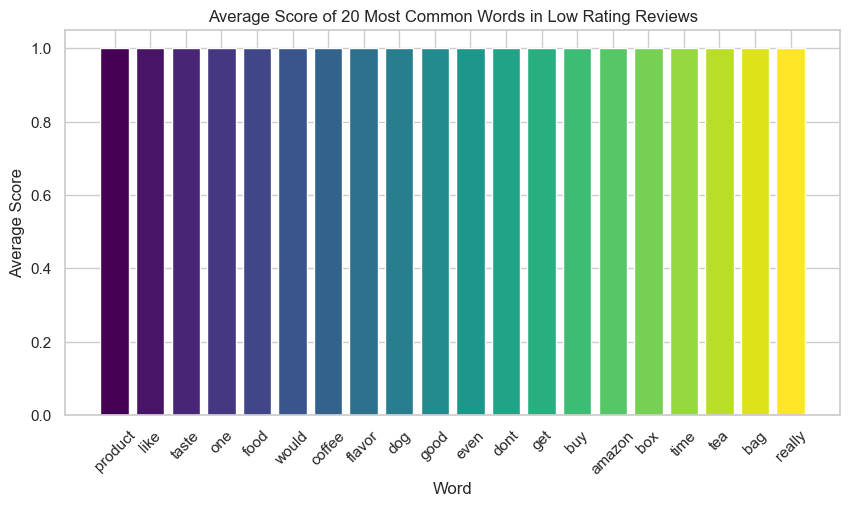

In [25]:
# Filter the data to include only reviews with a rating below 2
low_rating_data = data[data['Score'] < 2]

# Count the occurrence of each word in the low rating reviews
word_counts = Counter(word for words in low_rating_data['ProcessedText'] for word in words)

# Identify the 20 most common words in the low rating reviews
most_common_words = [word for word, count in word_counts.most_common(20)]

# Initialize a dictionary to hold the total score and count of each word
word_scores = {word: [0, 0] for word in most_common_words}

# Loop over the reviews and update the scores and counts
for words, rating in zip(low_rating_data['ProcessedText'], low_rating_data['Score']):
    for word in words:
        if word in word_scores:
            word_scores[word][0] += rating
            word_scores[word][1] += 1

# Calculate the average score for each word
average_word_scores = {word: total_score / count for word, (total_score, count) in word_scores.items()}

# Sort the words by average score in ascending order
sorted_words = sorted(average_word_scores.items(), key=lambda item: item[1])

# Get the words and their scores
words, scores = zip(*sorted_words)

# Create a bar plot of the average scores
plt.figure(figsize=(10, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, scores, color=colors)
plt.xlabel('Word')
plt.ylabel('Average Score')
plt.title('Average Score of 20 Most Common Words in Low Rating Reviews')
plt.xticks(rotation=45)
plt.show()

### 5.4 Most common words exclusively appear on bad reviews

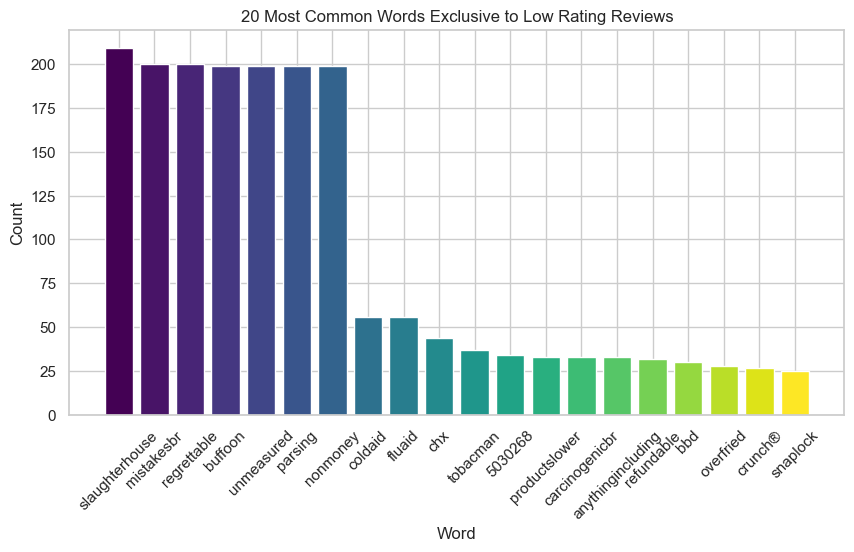

In [29]:
# Filter the data to create two groups: low-rated reviews and high-rated reviews
low_rating_data = data[data['Score'] < 2]
high_rating_data = data[data['Score'] > 2]

# Count the occurrence of each word in the low rating reviews
low_rating_word_counts = Counter(word for words in low_rating_data['ProcessedText'] for word in words)

# Count the occurrence of each word in the high rating reviews
high_rating_word_counts = Counter(word for words in high_rating_data['ProcessedText'] for word in words)

# Filter the low rating word counts to include only words that do not appear in high rating reviews
# For this, we will assume a word "less likely appears" in high rating reviews if its count is less than 5% of the count in low rating reviews
filtered_word_counts = Counter({word: count for word, count in low_rating_word_counts.items() if high_rating_word_counts.get(word, 0) < 0.05 * count})

# Identify the 20 most common words in the filtered word counts
most_common_words = filtered_word_counts.most_common(20)

# Create a bar plot of the word counts
plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_words)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('20 Most Common Words Exclusive to Low Rating Reviews')
plt.xticks(rotation=45)
plt.show()

### 5.5 Differences Between Good and Bad Reviews <a name="differences-between-good-and-bad-reviews"></a>

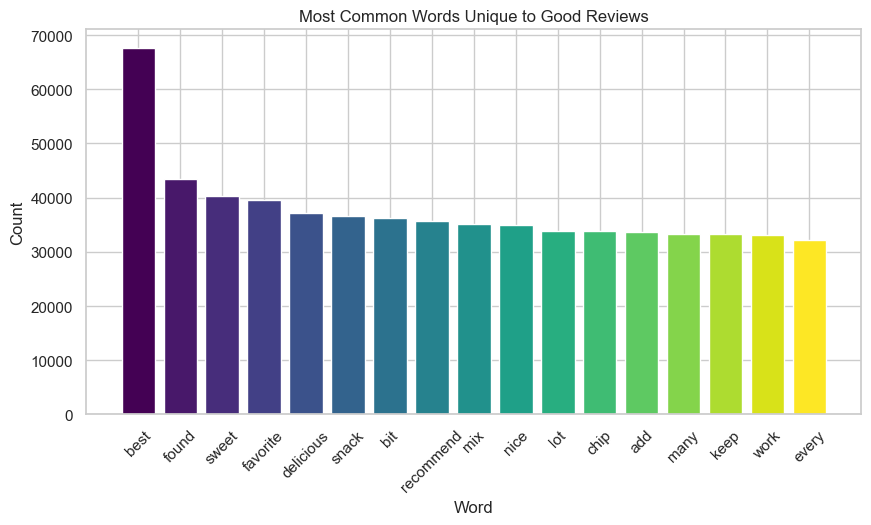

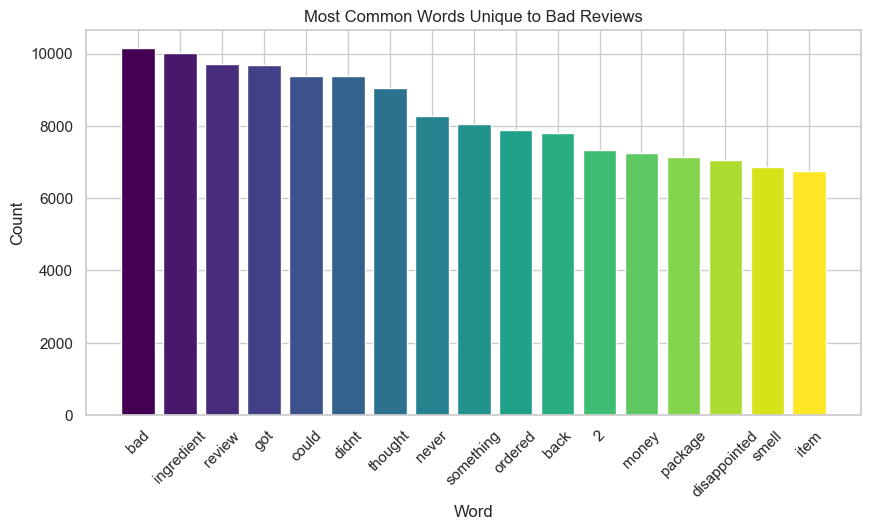

In [33]:
# Filter the data to create two groups: good reviews and bad reviews
good_reviews = data[data['Score'] >= 4]
bad_reviews = data[data['Score'] <= 2]

# Count the occurrence of each word in the good and bad reviews
good_word_counts = Counter(word for words in good_reviews['ProcessedText'] for word in words)
bad_word_counts = Counter(word for words in bad_reviews['ProcessedText'] for word in words)

# Identify the 80 most common words in the good and bad reviews
most_common_good_words = good_word_counts.most_common(80)
most_common_bad_words = bad_word_counts.most_common(80)

# Convert to sets for easy comparison
good_words = set(word for word, count in most_common_good_words)
bad_words = set(word for word, count in most_common_bad_words)

# Find words that are unique to good reviews and bad reviews
unique_good_words = good_words - bad_words
unique_bad_words = bad_words - good_words

# Filter the word count dictionaries to include only the unique words
unique_good_word_counts = {word: count for word, count in most_common_good_words if word in unique_good_words}
unique_bad_word_counts = {word: count for word, count in most_common_bad_words if word in unique_bad_words}

# Create a bar plot of the word counts for unique good words
plt.figure(figsize=(10, 5))
words, counts = zip(*unique_good_word_counts.items())
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words Unique to Good Reviews')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot of the word counts for unique bad words
plt.figure(figsize=(10, 5))
words, counts = zip(*unique_bad_word_counts.items())
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words Unique to Bad Reviews')
plt.xticks(rotation=45)
plt.show()

### 5.6 Differences Between Helpful and Non-Helpful Reviews <a name="differences-between-helpful-and-non-helpful-reviews"></a>

#### The objectives of this analysis include visualizing the potential impact of review length on helpfulness, examining the influence of word selection on helpfulness, and observing the trend of helpfulness based on product rating.

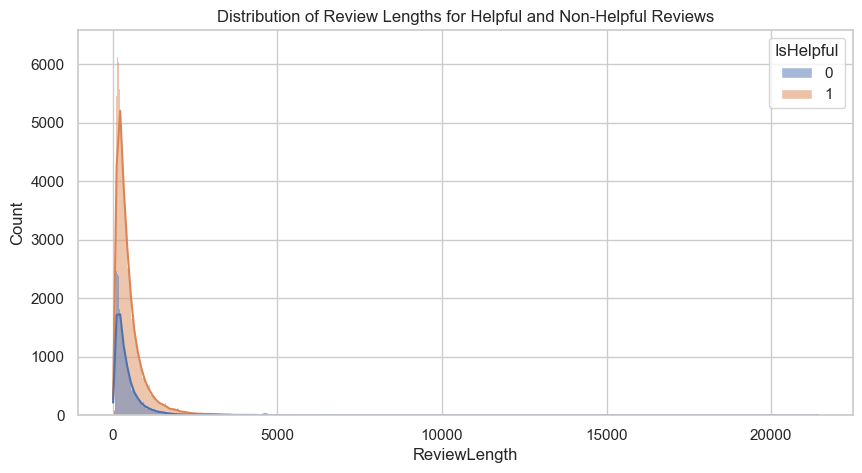

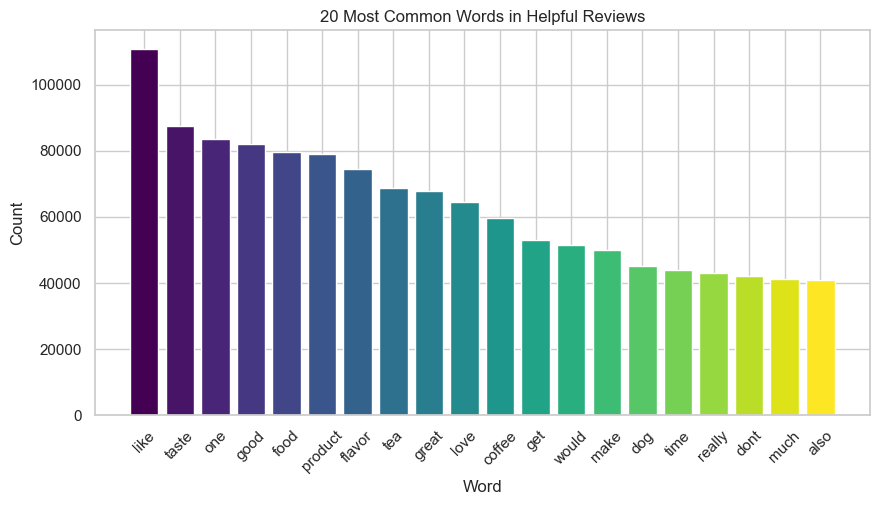

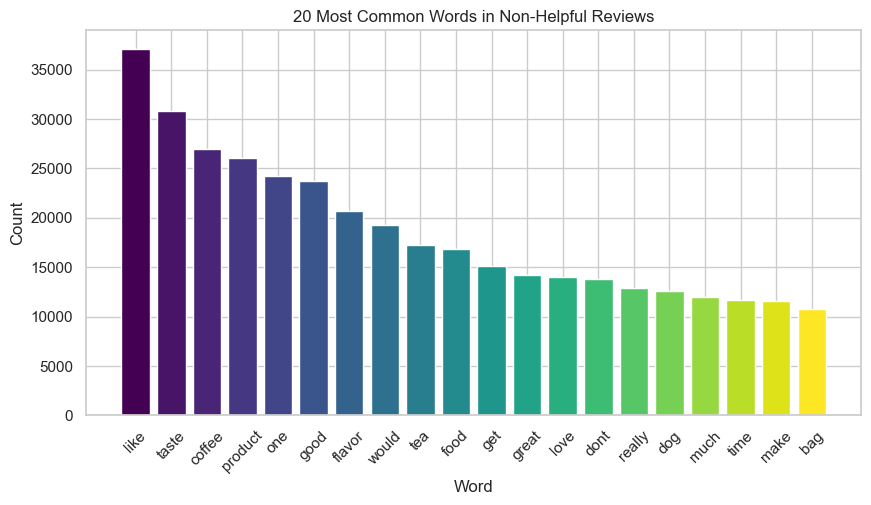

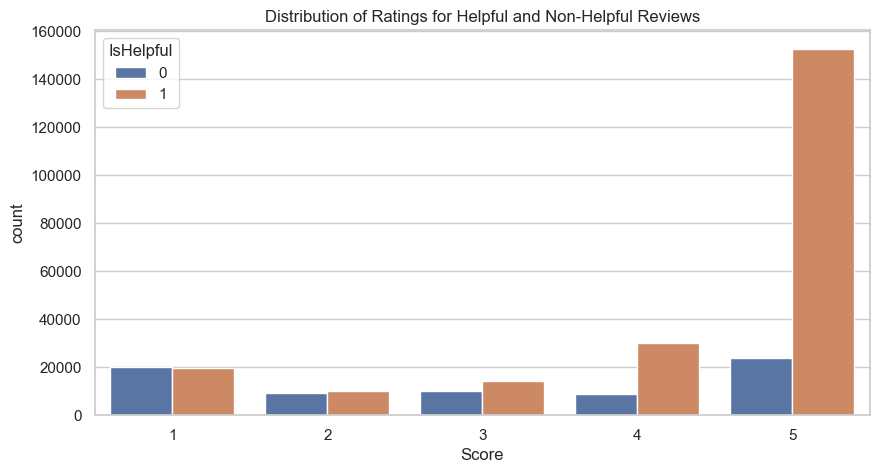

In [34]:
data['ReviewLength'] = data['Text'].apply(len)

# Calculate helpfulness ratio
data = data[data['HelpfulnessDenominator'] > 0]  # Exclude rows where denominator is 0
data['HelpfulnessRatio'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']

# Define a threshold for a review to be considered helpful
threshold = 0.5
data['IsHelpful'] = (data['HelpfulnessRatio'] > threshold).astype(int)

# Plot distribution of review lengths for helpful and non-helpful reviews
plt.figure(figsize=(10, 5))
sns.histplot(data, x='ReviewLength', hue='IsHelpful', kde=True)
plt.title('Distribution of Review Lengths for Helpful and Non-Helpful Reviews')
plt.show()

# Count the occurrence of each word in the helpful and non-helpful reviews
helpful_reviews = data[data['IsHelpful'] == 1]
non_helpful_reviews = data[data['IsHelpful'] == 0]
helpful_word_counts = Counter(word for words in helpful_reviews['ProcessedText'] for word in words)
non_helpful_word_counts = Counter(word for words in non_helpful_reviews['ProcessedText'] for word in words)

# Identify the 20 most common words in the helpful and non-helpful reviews
most_common_helpful_words = helpful_word_counts.most_common(20)
most_common_non_helpful_words = non_helpful_word_counts.most_common(20)

# Plot the 20 most common words in helpful and non-helpful reviews
plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_helpful_words)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('20 Most Common Words in Helpful Reviews')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_non_helpful_words)
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Generate a color map
plt.bar(words, counts, color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('20 Most Common Words in Non-Helpful Reviews')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of ratings for helpful and non-helpful reviews
plt.figure(figsize=(10, 5))
sns.countplot(x='Score', hue='IsHelpful', data=data)
plt.title('Distribution of Ratings for Helpful and Non-Helpful Reviews')
plt.show()